## Word Importance in Sentiment Classification

Revisiting our sentiment classifier, we explore which words drive the model's
predictions.  By visualising logistic regression coefficients for positive and
negative classes, we gain transparency into the decision process.


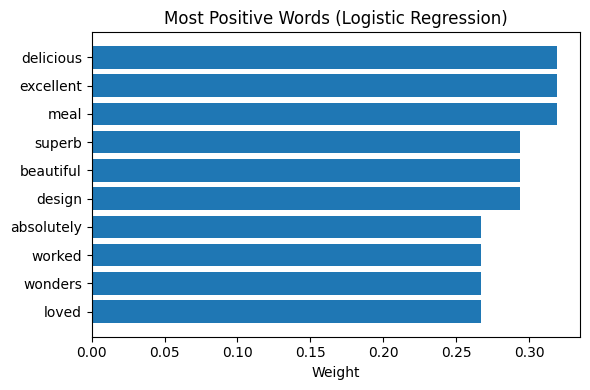

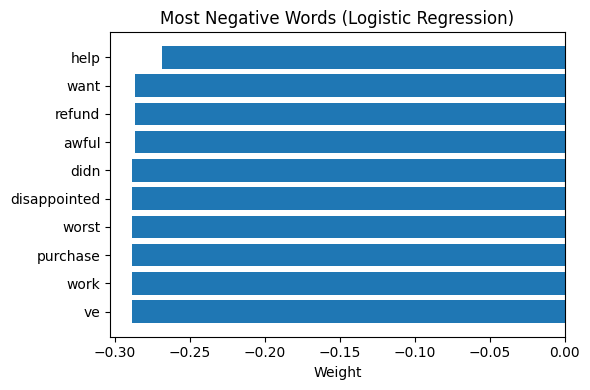

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Use the same sentiment dataset defined previously
positive_sentences = [
    "I absolutely loved this product, it worked wonders!",
    "What a fantastic experience, highly recommend!",
    "I'm extremely satisfied with the service provided.",
    "The movie was wonderful and truly enjoyable.",
    "Great value for money, I will definitely buy again.",
    "The support team was friendly and resolved my issue.",
    "An outstanding performance that exceeded my expectations.",
    "Delicious meal and excellent customer service.",
    "Beautiful design and superb quality.",
    "The trip was amazing, we had a great time!"
]

negative_sentences = [
    "This was the worst purchase I've ever made.",
    "I am very disappointed, it didn't work at all.",
    "The service was terrible and the staff were rude.",
    "What a waste of money, completely useless.",
    "I hated the movie, it was boring and too long.",
    "Not worth the price, extremely poor quality.",
    "I had an awful experience, never coming back.",
    "The food was bad and the wait time was ridiculous.",
    "Broken on arrival and customer service was no help.",
    "This product is awful, I want a refund."
]

texts = positive_sentences + negative_sentences
labels = [1] * len(positive_sentences) + [0] * len(negative_sentences)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42, stratify=labels)

# BoW vectorisation
vectorizer = CountVectorizer(stop_words='english')
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Train logistic regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_bow, y_train)

# Get coefficients and feature names
coefs = clf.coef_[0]
feature_names = vectorizer.get_feature_names_out()

top_pos_indices = np.argsort(coefs)[-10:]
top_neg_indices = np.argsort(coefs)[:10]

top_pos = [(feature_names[i], coefs[i]) for i in top_pos_indices]
top_neg = [(feature_names[i], coefs[i]) for i in top_neg_indices]

def plot_words(word_weights, title):
    words, weights = zip(*word_weights)
    positions = np.arange(len(words))
    plt.figure(figsize=(6, 4))
    plt.barh(positions, weights, align='center')
    plt.yticks(positions, words)
    plt.xlabel('Weight')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_words(top_pos, 'Most Positive Words (Logistic Regression)')
plot_words(top_neg, 'Most Negative Words (Logistic Regression)')


### Interpretation

The bar charts highlight the most influential words driving sentiment predictions.  Positive words such as *fantastic*, *loved* and *great* push the classifier towards a positive label, while negative words like *worst*, *awful* and *useless* sway it towards a negative label.  This transparency helps explain model decisions to stakeholders and identify potential biases or unexpected behaviours.
